<a href="https://colab.research.google.com/github/greci-gareli/Maps_Bar_Aim1/blob/main/Aim1_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libreries
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path= '/content/gdrive/MyDrive/Colab Notebooks/Mapas/Mexican_museums.csv'

#Obtaining the data frame
df = pd.read_csv(root_path, encoding="ISO-8859-1")

df.head(2)

Mounted at /content/gdrive


,museo_id,museo_nombre,museo_tematica_n1,museo_fecha_fundacion,museo_adscripcion,estado_id,nom_ent,municipio_id,nom_mun,localidad_id,...,museo_cp,museo_telefono1,pagina_web,pagina_web2,email,twitter,gmaps_longitud,gmaps_latitud,link_sic,fecha_mod
0,223,Museo de Aguascalientes,Arte,1975-10-22,Instituto Cultural de Aguascalientes (ICA),1,Aguascalientes,1,Aguascalientes,1,...,20000.0,(449) 916 71 42,NaN,NaN,museoaguascalientes@gmail.com,NaN,-102.29129,21.88575,http://sic.gob.mx/ficha.php?table=museo&table_...,2021-01-15 06:34:20-06
1,1453,Museo de Sitio los Arquitos,Historia,1994-11-01,Instituto Cultural de Aguascalientes/Centro Cu...,1,Aguascalientes,1,Aguascalientes,1,...,20000.0,(449) 916 92 01,https://www.aguascalientes.gob.mx/temas/cultura/,NaN,c.culturallosarquitos@gmail.com,NaN,-102.28221,21.88298,http://sic.gob.mx/ficha.php?table=museo&table_...,2021-06-07 05:56:30-05


In [ ]:
#Dropping the the columns that are not necessary
#Dropping the the columns that are not necessary
df= df.drop(['museo_id','museo_adscripcion', 'nom_ent', 
             'municipio_id','nom_mun', 'localidad_id', 'nom_loc', 'museo_calle_numero', 'museo_colonia', 'museo_cp', 
             'museo_telefono1', 'pagina_web', 'pagina_web2', 'email', 'twitter','gmaps_longitud', 'gmaps_latitud',
             'link_sic','fecha_mod','museo_fecha_fundacion' ], axis = 1)

#Renaming
df=df.rename(columns={'museo_tematica_n1':'Type_of_museum',
                      'museo_nombre':'Museum_name',
                      'estado_id':'State'})

#Grouping the data by Country
df['State']=df['State']. replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                                  19,20,21,22,23,24,25,26,27,28,29,30,31,32],
                                 ['Aguascalientes','Baja California','Baja California Sur',
                                  'Campeche', 'Coahuila','Colima','Chiapas','Chihuahua',
                                  'Ciudad de México','Durango','Guanajuato', 'Guerrero',
                                  'Hidalgo','Jalisco','México','Michoacán',
                                  'Morelos','Nayarit', 'Nuevo León','Oaxaca','Puebla',
                                  'Querétaro', 'Quintana Roo','San Luis Potosí','Sinaloa', 
                                  'Sonora','Tabasco', 'Tamaulipas', 'Tlaxcala',
                                  'Veracruz','Yucatán','Zacatecas'])
df

,Museum_name,Type_of_museum,State
0,Museo de Aguascalientes,Arte,Aguascalientes
1,Museo de Sitio los Arquitos,Historia,Aguascalientes
2,Museo Nacional de la Muerte,Arte,Aguascalientes
3,Museo José Guadalupe Posada,Arte,Aguascalientes
4,Museo de Sitio del Teatro Morelos,NaN,Aguascalientes
...,...,...,...
1428,Museo de la Industria de Reuniones,NaN,Zacatecas
1429,Museo Toma de Zacatecas,Historia,Zacatecas
1430,Museo de las Rocas y Minerales,Ciencia y tecnología,Zacatecas
1431,Sala Despacho Antonio Aguilar Barraza,NaN,Zacatecas


In [ ]:
#Science museums
ty='Ciencia y tecnología'
mask=(df['Type_of_museum']==ty) 
df=df.loc[mask]
df

,Museum_name,Type_of_museum,State
8,Museo de la Fauna,Ciencia y tecnología,Aguascalientes
9,Descubre. Museo Interactivo de Ciencia y Tecno...,Ciencia y tecnología,Aguascalientes
16,Caracol Museo de Ciencias,Ciencia y tecnología,Baja California
17,Museo Katsuo,Ciencia y tecnología,Baja California
29,Museo Sol del Niño,Ciencia y tecnología,Baja California
...,...,...,...
1397,Museo Comunitario de Zóquite,Ciencia y tecnología,Zacatecas
1402,Museo de la Irrigación,Ciencia y tecnología,Zacatecas
1422,Centro Interactivo de Ciencias Zig Zag,Ciencia y tecnología,Zacatecas
1427,Museo Universitario de Ciencias,Ciencia y tecnología,Zacatecas


In [ ]:
#Network 1 Activities

from google.colab import drive
drive.mount('/content/gdrive')
root_path= '/content/gdrive/MyDrive/Colab Notebooks/Networks/Net2_activities.csv'

#Obtaining the data frame
df = pd.read_csv(root_path)

df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Source,Target,Type,Weight,Bib,State,Num
0,interactive exhibits,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1
1,graphic exhibits,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1
2,historical exhibits,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1
3,science films,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1
4,skeleton exhibits,Anatomopatología Veterinaria Manuel H. Sarvide,Undirected,3,https://www.fmvz.unam.mx/fmvz/departamentos/pa...,Mexico City,2
...,...,...,...,...,...,...,...
56,games,Papalote Museo del Niño Chapultepec,Undirected,3,https://www.papalote.org.mx/,Mexico City,17
57,workshops,Papalote Museo del Niño Chapultepec,Undirected,3,https://www.papalote.org.mx/,Mexico City,17
58,interactive exhibits,Papalote Museo del Niño Chapultepec,Undirected,3,https://www.papalote.org.mx/,Mexico City,17
59,graphic exhibits,Papalote Museo del Niño Chapultepec,Undirected,3,https://www.papalote.org.mx/,Mexico City,17


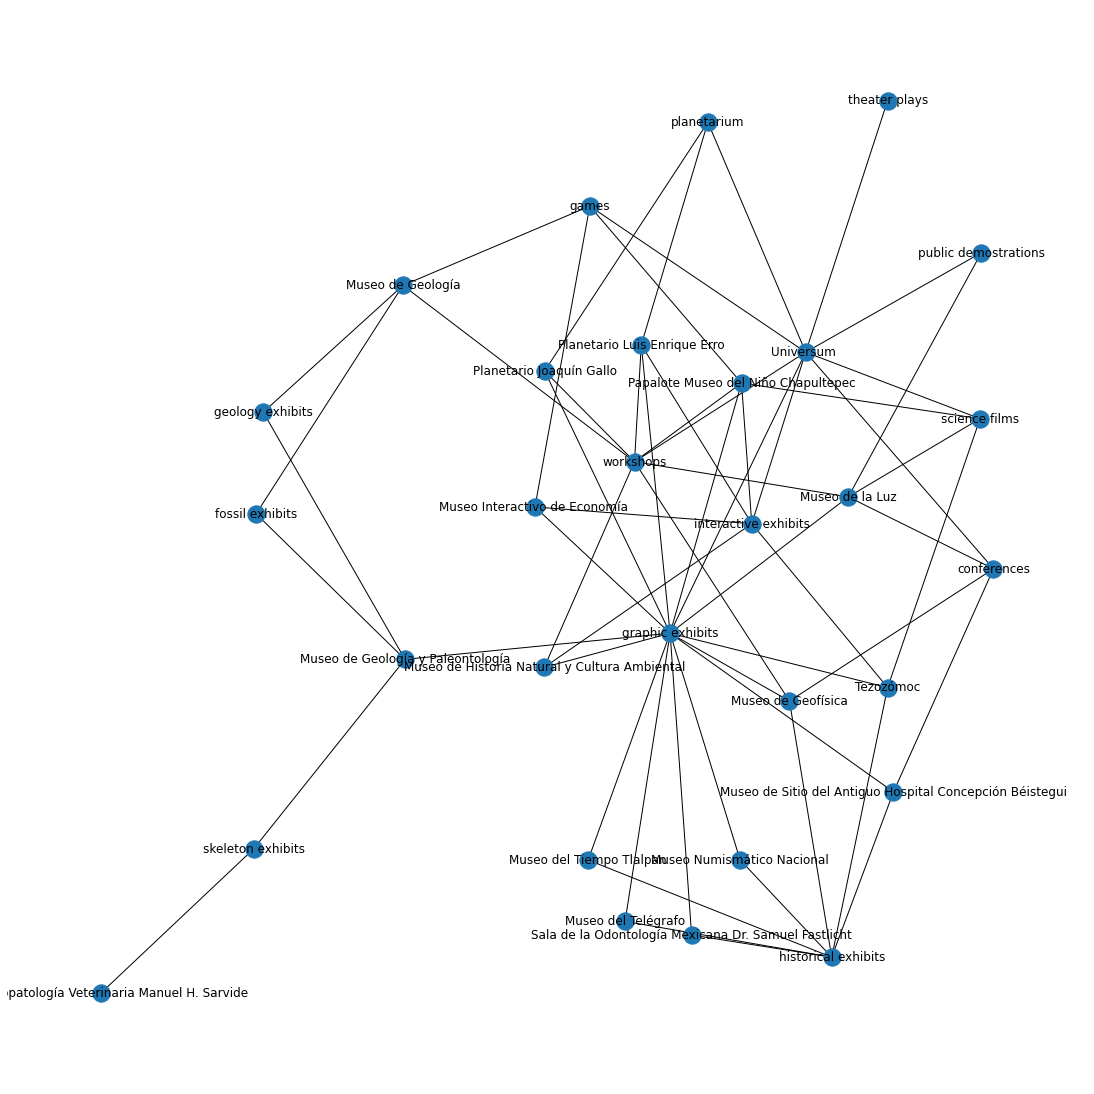

In [ ]:

G=nx.from_pandas_edgelist(df,
                          source='Source',
                          target='Target',
                          edge_attr='Weight')

nx.draw_kamada_kawai(G, with_labels = True)

plt.rcParams['figure.figsize'] = [20, 20]

In [ ]:
#Network 1 Activities

from google.colab import drive
drive.mount('/content/gdrive')
root_path_2= '/content/gdrive/MyDrive/Colab Notebooks/Networks/Net2_areas.csv'

#Obtaining the data frame
df_2 = pd.read_csv(root_path_2)

df_2.head(2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Source,Target,Type,Weight,Bib,State,Num
0,mathematics,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1
1,physics,Tezozómoc,Undirected,3,https://www5.aefcm.gob.mx/Museo/imprimeoferta....,Mexico City,1


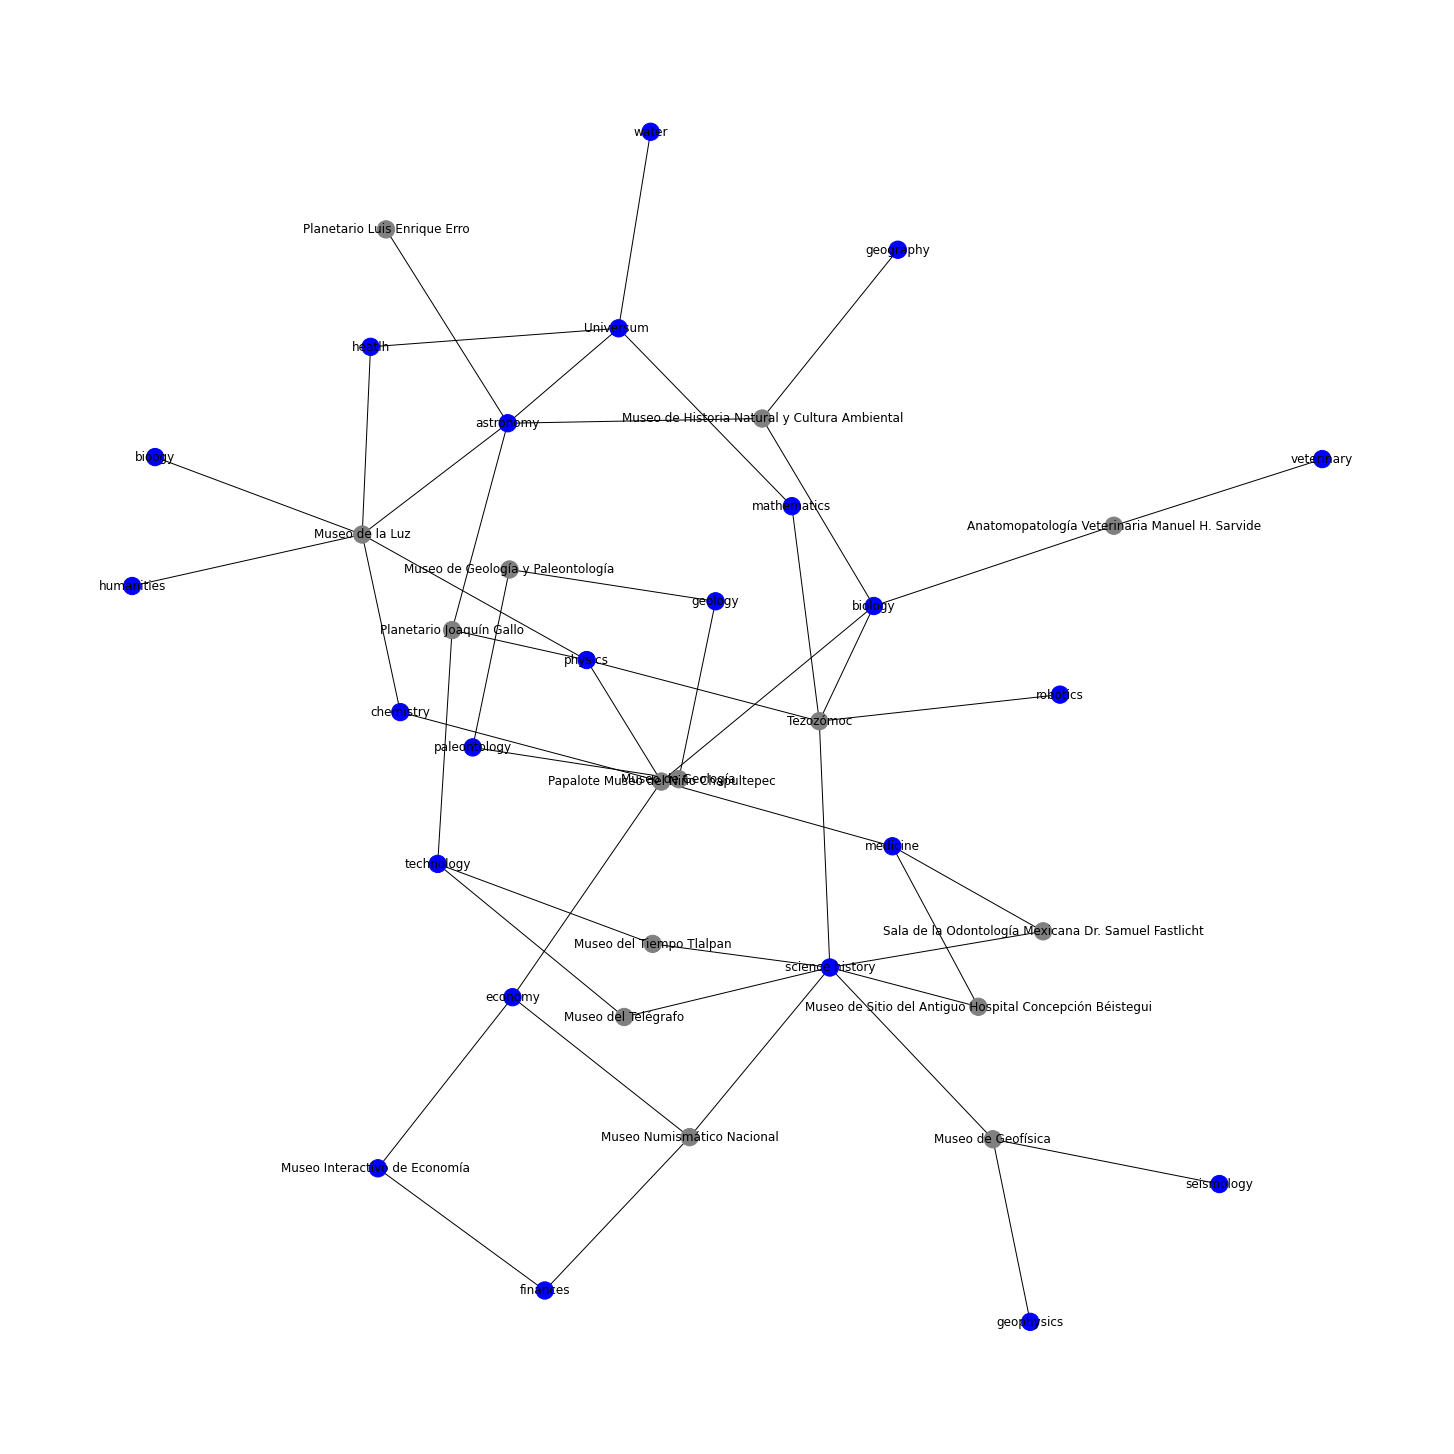

In [ ]:
F=nx.from_pandas_edgelist(df_2,
                          source='Source',
                          target='Target',
                          edge_attr='Weight')
color_map = []
for node in F:
    if node == 'Tezozómoc':
        color_map.append('gray')
    elif  node == 'Anatomopatología Veterinaria Manuel H. Sarvide':
      color_map.append('gray')
    elif  node == 'Universum':
      color_map.append('gray')
    elif  node == 'Planetario Luis Enrique Erro':
      color_map.append('gray')
    elif  node == 'Museo de Geología y Paleontología':
      color_map.append('gray')
    elif  node == 'Museo del Tiempo Tlalpan':
      color_map.append('gray')
    elif  node == 'Planetario Joaquín Gallo':
      color_map.append('gray')
    elif  node == 'Museo de la Luz':
      color_map.append('gray')
    elif  node == 'Museo del Telégrafo':
      color_map.append('gray')
    elif  node == 'Museo de Sitio del Antiguo Hospital Concepción Béistegui':
      color_map.append('gray')
    elif  node == 'Museo Interactivo de Economía':
      color_map.append('gray')
    elif  node == 'Museo de Geología':
      color_map.append('gray')
    elif  node == 'Sala de la Odontología Mexicana Dr. Samuel Fastlicht':
      color_map.append('gray')
    elif  node == 'Museo Numismático Nacional':
      color_map.append('gray')
    elif  node == 'Museo de Geofísica':
      color_map.append('gray')
    elif  node == 'Museo de Historia Natural y Cultura Ambiental':
      color_map.append('gray')
    elif  node == 'Papalote Museo del Niño Chapultepec':
      color_map.append('gray') 
    else: 
        color_map.append('blue')    

nx.draw_kamada_kawai(F, with_labels = True, node_color= color_map)
plt.rcParams['figure.figsize'] = [15, 15]